<a href="https://colab.research.google.com/github/kaanberke/youtube_courses/blob/master/hello_tensorflow/ANN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN FROM SCRATCH

### Importing Libraries

In [ ]:
import numpy as np, sys
from keras.datasets import mnist
import matplotlib.pyplot as plt

np.random.seed(42)

### Loading Data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("-"*30)
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
------------------------------
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Data Preprocessing

In [ ]:
images = X_train[0:1000]
labels = y_train[0:1000]
print(images.shape)

(1000, 28, 28)


In [ ]:
images = images.reshape(1000, 28*28)
print(images.shape)
print(images[0])

(1000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   

In [ ]:
images = images / 255
print(images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
labels.shape

(1000,)

In [ ]:
one_hot_encoder = np.zeros((len(labels), 10))
print(one_hot_encoder.shape)

(1000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
for idx, label in enumerate(labels):
    one_hot_encoder[idx][label] = 1

labels = one_hot_encoder
print(labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
test_images = X_test.reshape(len(X_test), 28*28) / 255
test_labels = np.zeros((len(y_test), 10))
for idx, label in enumerate(y_test):
    test_labels[idx][label] = 1

print(test_labels[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Activation Functions

In [ ]:
def tanh(x):
    return np.tanh(x)

def tanh2deriv(output):
    return 1 - (output ** 2)

def softmax(x):
    temp = np.exp(x)
    return temp / np.sum(temp, axis=1, keepdims=True)

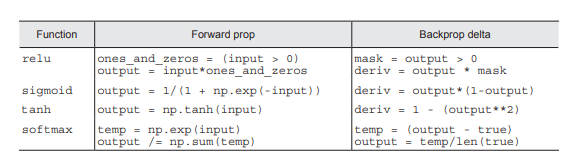

### Hyperparameters

In machine learning, a hyperparameter is a parameter whose value is used to control the learning process. 

By contrast, the values of other parameters are derived via training.

In [ ]:
lr = 2
EPOCH = 200
BATCH = 100
label_numbers = 10
hidden_size = 100
image_pixels = 28 * 28 # 784

### Weight Initialization

In [ ]:
weights_0_1 = 0.02*np.random.random((image_pixels, hidden_size))  - 0.01
weights_1_2 = 0.20*np.random.random((hidden_size, label_numbers)) - 0.10

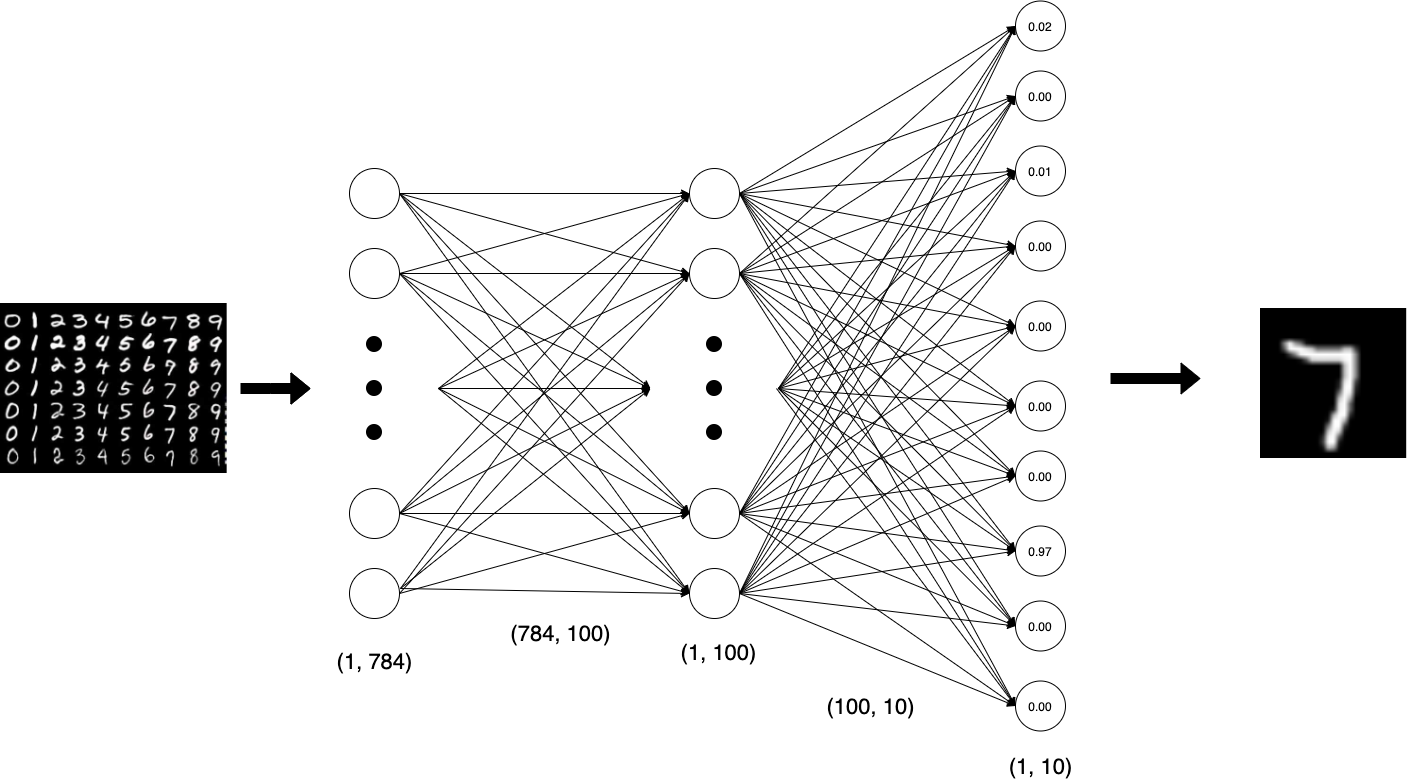

### Model

Credit: https://github.com/iamtrask/Grokking-Deep-Learning/

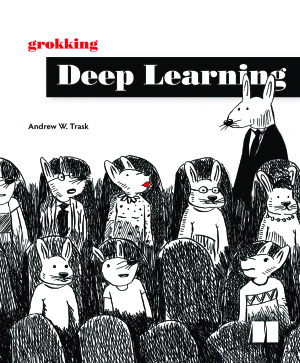

In [ ]:
for j in range(EPOCH):
    correct_cnt = 0
    for i in range(int(len(images) / BATCH)):
        batch_start, batch_end = ((i * BATCH), ((i+1)*BATCH))
        layer_0 = images[batch_start: batch_end]
        layer_1 = tanh(np.dot(layer_0, weights_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 = layer_1 * dropout_mask * 2
        layer_2 = softmax(np.dot(layer_1, weights_1_2))

        for k in range(BATCH):
            correct_cnt += int(np.argmax(layer_2[k: k+1]) == np.argmax(labels[batch_start+k: batch_start+k+1]))

        layer_2_delta = (labels[batch_start: batch_end] - layer_2) / (BATCH * layer_2.shape[0])
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * tanh2deriv(layer_1)
        layer_1_delta *= dropout_mask

        weights_1_2 += lr * layer_1.T.dot(layer_2_delta)
        weights_0_1 += lr * layer_0.T.dot(layer_1_delta)

    test_correct_cnt = 0

    for i in range(len(test_images)):

        layer_0 = test_images[i:i+1]
        layer_1 = tanh(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)

        test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
    
    if j % 10 == 0:
        sys.stdout.write("\n"+ \
         "I:" + str(j) + \
         " Test-Acc:"+str(test_correct_cnt/float(len(test_images)))+\
         " Train-Acc:" + str(correct_cnt/float(len(images))))


I:0 Test-Acc:0.3696 Train-Acc:0.191
I:10 Test-Acc:0.6723 Train-Acc:0.697
I:20 Test-Acc:0.6928 Train-Acc:0.707
I:30 Test-Acc:0.728 Train-Acc:0.748
I:40 Test-Acc:0.7624 Train-Acc:0.786
I:50 Test-Acc:0.792 Train-Acc:0.826
I:60 Test-Acc:0.8109 Train-Acc:0.852
I:70 Test-Acc:0.8209 Train-Acc:0.868
I:80 Test-Acc:0.8273 Train-Acc:0.873
I:90 Test-Acc:0.833 Train-Acc:0.882
I:100 Test-Acc:0.8397 Train-Acc:0.884
I:110 Test-Acc:0.8443 Train-Acc:0.9
I:120 Test-Acc:0.8459 Train-Acc:0.898
I:130 Test-Acc:0.8485 Train-Acc:0.9
I:140 Test-Acc:0.8516 Train-Acc:0.909
I:150 Test-Acc:0.8538 Train-Acc:0.917
I:160 Test-Acc:0.8561 Train-Acc:0.919
I:170 Test-Acc:0.8585 Train-Acc:0.916
I:180 Test-Acc:0.8595 Train-Acc:0.924
I:190 Test-Acc:0.8608 Train-Acc:0.936

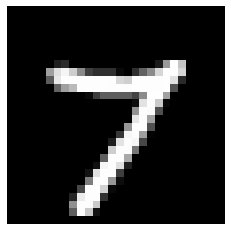

In [ ]:
idx = np.random.randint(len(test_images))
label = np.argmax(test_labels[idx])
plt.imshow(test_images[idx].reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
layer_0 = test_images[idx: idx+1]
layer_1 = tanh(np.dot(layer_0,weights_0_1))
layer_2 = softmax(np.dot(layer_1,weights_1_2))
pred_idx = np.argmax(layer_2)

print(f"I think the number on the image is : {pred_idx}")
print(f"And I am %{layer_2.T[pred_idx][0]*100:.2f} sure..")

I think the number on the image is : 7
And I am %99.33 sure..


In [ ]:
layer_2

array([[2.45064208e-04, 5.04069666e-05, 5.51116986e-05, 7.01206775e-04,
        2.70512636e-04, 6.08840637e-05, 2.61733441e-06, 9.93332102e-01,
        1.85054239e-04, 5.09704017e-03]])

# Tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Train
images = X_train / 255.0

labels = y_train 
labels = tf.keras.utils.to_categorical(labels)

## Test
test_images = X_test / 255.0

test_labels = y_test 
test_labels = tf.keras.utils.to_categorical(test_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation="tanh"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(images, labels, 
                    batch_size=32, 
                    epochs=100, 
                    validation_data=(test_images, test_labels))

Epoch 1/100
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4495 - accuracy: 0.8720 - val_loss: 0.1683 - val_accuracy: 0.9521
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1521 - accuracy: 0.9562 - val_loss: 0.1239 - val_accuracy: 0.9634
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1000 - accuracy: 0.9706 - val_loss: 0.0976 - val_accuracy: 0.9703
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0719 - accuracy: 0.9794 - val_loss: 0.0887 - val_accuracy: 0.9719
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0578 - accuracy: 0.9834 - val_loss: 0.0832 - val_accuracy: 0.9743
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0466 - accuracy: 0.9865 - val_loss: 0.0861 - val_accuracy: 0.9730
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0352 - accuracy: 0.9903 - val_loss: 0.0799 - val_ac

KeyboardInterrupt: ignored